In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

In [3]:
# Importar datos desde GitHub
url = "https://raw.github.com/1007451013i/Proyecto-Soluciones-Analiticas/main/heart.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
# Definir columna objetivo
target_col = "condition"

# Definir variables predictoras y variable objetivo
X = df.drop(columns=[target_col])
y = df[target_col]

# Dividir datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((207, 13), (90, 13))

In [5]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Realizar función para calcular métricas
def calcular_metricas(y_true, y_pred, y_proba=None):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
    }
    if y_proba is not None:
        metrics["roc_auc"] = roc_auc_score(y_true, y_proba)
    else:
        metrics["roc_auc"] = np.nan
    return metrics

In [7]:
# Modelo 1: Regresión Logística
lr = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

# Entrenar los datos escalados
lr.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas
metrics_lr = calcular_metricas(y_test, y_pred_lr, y_proba_lr)
metrics_lr

{'accuracy': 0.8777777777777778,
 'precision': 0.9428571428571428,
 'recall': 0.7857142857142857,
 'f1': 0.8571428571428571,
 'roc_auc': np.float64(0.9350198412698413)}

In [8]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=42
)

# Entrenar los datos sin escalar
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics_rf = calcular_metricas(y_test, y_pred_rf, y_proba_rf)
metrics_rf

{'accuracy': 0.8333333333333334,
 'precision': 0.8857142857142857,
 'recall': 0.7380952380952381,
 'f1': 0.8051948051948052,
 'roc_auc': np.float64(0.9295634920634921)}

In [9]:
# Modelo 3: Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Entrenar los datos sin escalar
gb.fit(X_train, y_train)

# Realizar predicciones
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics_gb = calcular_metricas(y_test, y_pred_gb, y_proba_gb)
metrics_gb

{'accuracy': 0.8333333333333334,
 'precision': 0.8292682926829268,
 'recall': 0.8095238095238095,
 'f1': 0.8192771084337349,
 'roc_auc': np.float64(0.9171626984126984)}

In [10]:
# Modelo 4: XGBoost
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Entrenar los datos sin escalar
xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics_xgb = calcular_metricas(y_test, y_pred_xgb, y_proba_xgb)
metrics_xgb

{'accuracy': 0.8111111111111111,
 'precision': 0.8378378378378378,
 'recall': 0.7380952380952381,
 'f1': 0.7848101265822784,
 'roc_auc': np.float64(0.9345238095238095)}

In [11]:
# Comparar los 4 modelos
resultados = pd.DataFrame([
    ("Logistic Regression",) + (
        metrics_lr["accuracy"],
        metrics_lr["precision"],
        metrics_lr["recall"],
        metrics_lr["f1"],
        metrics_lr["roc_auc"],
    ),
    ("Random Forest",) + (
        metrics_rf["accuracy"],
        metrics_rf["precision"],
        metrics_rf["recall"],
        metrics_rf["f1"],
        metrics_rf["roc_auc"],
    ),
    ("Gradient Boosting",) + (
        metrics_gb["accuracy"],
        metrics_gb["precision"],
        metrics_gb["recall"],
        metrics_gb["f1"],
        metrics_gb["roc_auc"],
    ),
    ("XGBoost",) + (
        metrics_xgb["accuracy"],
        metrics_xgb["precision"],
        metrics_xgb["recall"],
        metrics_xgb["f1"],
        metrics_xgb["roc_auc"],
    ),
],
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]
)

resultados.sort_values(by="ROC_AUC", ascending=False)

,Modelo,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.877778,0.942857,0.785714,0.857143,0.935020
3,XGBoost,0.811111,0.837838,0.738095,0.784810,0.934524
1,Random Forest,0.833333,0.885714,0.738095,0.805195,0.929563
2,Gradient Boosting,0.833333,0.829268,0.809524,0.819277,0.917163


### Interpretación de resultados

La regresión logística obtuvo el mejor rendimiento global (AUC = 0.935, F1 = 0.857), superando levemente a los modelos de ensamble (Random Forest, Gradient Boosting y XGBoost), los cuales mantuvieron métricas altas y consistentes con la literatura (~0.92–0.94 de AUC).

Este resultado evidencia que, en este conjunto de datos, las relaciones entre variables son principalmente lineales y el tamaño muestral moderado permite a un modelo lineal explicar bien la variabilidad del fenómeno. Además, la regresión logística ofrece interpretabilidad clínica, por lo que se considera el modelo final seleccionado.

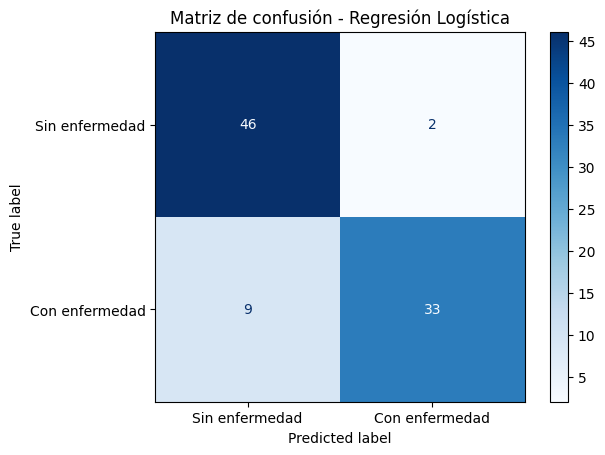

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión del mejor modelo (Regresión Logística)
ConfusionMatrixDisplay.from_estimator(
    lr, X_test_scaled, y_test,
    display_labels=["Sin enfermedad", "Con enfermedad"],
    cmap="Blues"
)
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

/tmp/ipython-input-3270546184.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variable", data=coef_df, palette="coolwarm")


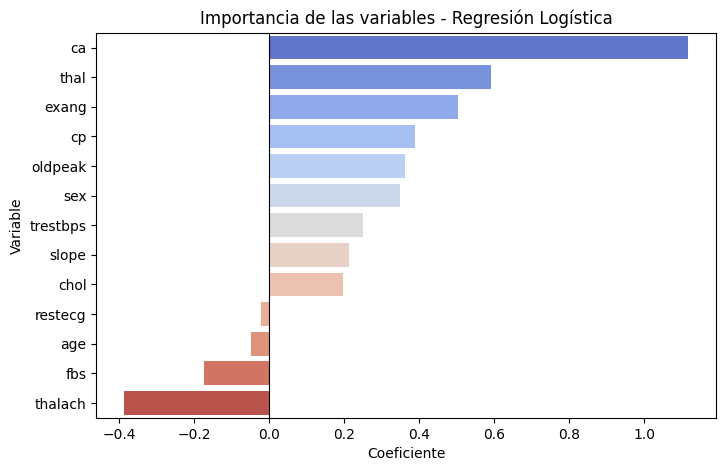

In [18]:
# Extraer coeficientes
coef = lr.coef_[0]
variables = X.columns

coef_df = pd.DataFrame({
    "Variable": variables,
    "Coeficiente": coef
}).sort_values(by="Coeficiente", ascending=False)

# Gráficar coeficientes
plt.figure(figsize=(8,5))
sns.barplot(x="Coeficiente", y="Variable", data=coef_df, palette="coolwarm")
plt.title("Importancia de las variables - Regresión Logística")
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

In [19]:
import numpy as np
import pandas as pd

# Extraer los coeficientes del modelo
coeficientes = lr.coef_[0]
intercepto = lr.intercept_[0]

# Calcular los Odds Ratios
odds_ratios = np.exp(coeficientes)

# Crear DataFrame con resultados
predictores_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coeficientes,
    "Odds Ratio": odds_ratios
}).sort_values(by="Coeficiente", ascending=False)

# Mostrar resultados
print(f"Intercepto: {intercepto:.4f}")
predictores_df

Intercepto: -0.0879


,Variable,Coeficiente,Odds Ratio
11,ca,1.116464,3.054036
12,thal,0.590412,1.804732
8,exang,0.502889,1.653492
2,cp,0.388875,1.475320
9,oldpeak,0.362594,1.437052
1,sex,0.348252,1.416590
3,trestbps,0.249744,1.283697
10,slope,0.212470,1.236729
4,chol,0.196514,1.217152
6,restecg,-0.021801,0.978435


/tmp/ipython-input-3311169761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Odds Ratio", y="Variable", data=predictores_df, palette="crest")


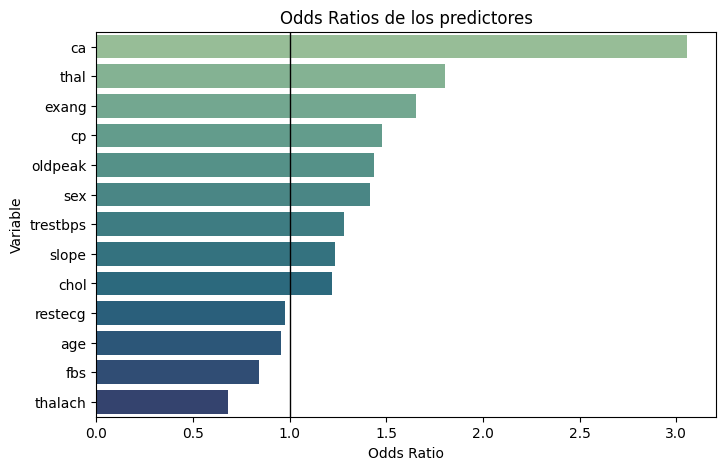

In [20]:
# Graficar Odds Ratio
plt.figure(figsize=(8,5))
sns.barplot(x="Odds Ratio", y="Variable", data=predictores_df, palette="crest")
plt.title("Odds Ratios de los predictores")
plt.axvline(1, color="black", linewidth=1)
plt.show()